# Fake News Detection Task - Augumentation - Dataset Combination


Advance Machine Learning **Project** - *A.Y. 2023/24*

**Team**:
*   **Mattia Piazzalunga** - 851931
*   **Nicolò Urbani** - 856213

**Beanchmark datasets**:

*   **WELFake dataset** - Verma et al.
*   **ISOT dataset** - Ahmed et al.

**Content**

In this analysis, the models will be trained on a larger dataset sourced from various origins, thereby enhancing the variability in the training data. The incorporation of data from diverse sources such as WELFake and ISOT datasets aims to augment data variability and evaluate the model's proficiency in handling information from different origins.

##Main global variables & functions

In [1]:
path_to_drive_folder = "/content/drive/MyDrive/Advanced_Machine_Learning"
file_name_ISOT_dataset_true = "dataset/ISOT_dataset_true.csv"
file_name_ISOT_dataset_fake = "dataset/ISOT_dataset_false.csv"
file_name_WELFake_dataset = "dataset/WELFake_dataset.csv"
file_slang_acronyms_abbreviations = "txt/slang_acronyms_abbreviations_fact_finder_ai.txt"
file_additional_stop_word="txt/additional_stop_words.txt"
file_name_preprocessed_combined_dataset = "preprocessed_dataset/preprocessed_combined_dataset.csv"
file_name_preprocessed_WELFake_dataset_NO_lemmatization = "preprocessed_dataset/preprocessed_WELFake_dataset_NO_lemmatization.csv"
file_name_preprocessed_ISOT_dataset_NO_lemmatization = "preprocessed_dataset/preprocessed_ISOT_dataset_NO_lemmatization.csv"
file_name_tokenized_basic_WELFake_dataset_with_lemmatization = "preprocessed_dataset/tokenized_basic_WELFake_dataset_with_lemmatization.csv"
file_name_GloVe="models/glove.twitter.27B.100d.txt"
file_name_tokenized_basic_ISOT_dataset_with_lemmatization = "preprocessed_dataset/tokenized_basic_dataset_with_lemmatization.csv"
file_name_embedded_GloVe_WELFake_dataset = "preprocessed_dataset/embedded_GloVe_WELFake_dataset.csv"
file_name_embedded_GloVe_ISOT_dataset = "preprocessed_dataset/embedded_GloVe_dataset.csv"
fine_name_model_lstm_combined="models/lstm_combined.h5"
fine_name_model_bi_lstm_combined="models/bi_lstm_combined.h5"
fine_name_model_bert_combined="models/bert_combined.h5"
file_name_model_basic_combined="models/basic_combined.h5"
additional_punctuation = {'“', '”', '‘', '’', '«', '»', '…', '–', '—', '・', '〈', '〉', '《', '》', '「', '」', '『', '』', '【', '】', '〔', '〕', '⁽', '⁾', '₍', '₎', 'ⁱ', 'ⁿ', '₊', '₋', '₌', '₍', '₎', '∙', '•', '⁃', '⁄', '⁑', '⁒', '⁓', '⁕', '⁖', '⁗', '⁘', '⁙', '⁚', '⁛', '⁜', '⁝', '⁞'}
embedding_size = 100
max_features_in_embedding_vector = 10000
max_number_of_words_in_a_comment = 200

In [2]:
def plot_performance(history):
  fig, ax = plt.subplots(1, 2)
  fig.tight_layout()
  train_acc = history.history['accuracy']
  valid_acc = history.history['val_accuracy']
  train_loss = history.history['loss']
  valid_loss = history.history['val_loss']

  train_loss_color = '#80cbbf'
  valid_loss_color = '#329c8c'
  train_acc_color = '#80cbbf'
  valid_acc_color = '#329c8c'

  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')

  ax[0].plot(train_loss, label='Training Loss', color=train_loss_color)
  ax[0].plot(valid_loss, label='Validation Loss', color=valid_loss_color)
  ax[0].legend()

  ax[1].set_title('Accuracy')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')

  ax[1].plot(train_acc, label='Training Accuracy', color=train_acc_color)
  ax[1].plot(valid_acc, label='Validation Accuracy', color=valid_acc_color)
  ax[1].legend()

  plt.show()

## Importing the libraries & data

### Downloading dependencies

In [3]:
!pip install contractions
!pip install spylls
!pip install tensorflow
!pip install keras
!pip install inflect
!pip install -q -U tensorflow-text
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 13.2 MB/s eta 0:00:00


### Importing the libraries

In [4]:
#OS
import os

#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import string
import seaborn as sns

#Pre-processing
import html
import pandas as pd
import string
import contractions
import re
import requests
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from spylls.hunspell import Dictionary
from nltk.corpus import wordnet
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
import inflect

#Keras
import keras
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Model, Sequential
from keras import layers
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import load_model
#from keras import ops

#TensofrFlow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.compat.v1.keras import backend as K
import tensorflow.data as tf_data
from official.nlp import optimization
import tensorflow_hub as hub
import tensorflow_text as text

#LSTM
from keras.layers import Dense, Embedding, LSTM, Bidirectional

#Tokenizer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer

#Sklearn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#Word cloud
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

###Mounting Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

#Set path to correct drive folder
os.chdir(path_to_drive_folder)

Mounted at /content/drive


###Loading of basic tokenized datasets with lemmatization

In [ ]:
#Loading WELFake tokenized with lemmatization
preprocessed_WELFake_dataset = pd.read_csv(file_name_tokenized_basic_WELFake_dataset_with_lemmatization)

#Loading ISOT tokenized with lemmatization
preprocessed_ISOT_dataset = pd.read_csv(file_name_tokenized_basic_ISOT_dataset_with_lemmatization)

###Removing generated NaN

In [ ]:
#Removing generated NaN - WELFake
preprocessed_WELFake_dataset = preprocessed_WELFake_dataset.replace('', pd.NA).dropna()

In [ ]:
#Removing generated NaN - ISOT
preprocessed_ISOT_dataset = preprocessed_ISOT_dataset.replace('', pd.NA).dropna()

## Dataset Combination

### Split Train Test

In [ ]:
X_train_WELFake, X_test_WELFake, y_train_WELFake, y_test_WELFake = train_test_split(
    preprocessed_WELFake_dataset["lemmatized"].astype(str),
    preprocessed_WELFake_dataset["label"],
    stratify=preprocessed_WELFake_dataset["label"],
    test_size=0.2,
    random_state=42)

In [ ]:
# Build a Dataframe with the training data from WELFake
preprocessed_WELFake_dataset_x = pd.DataFrame(X_train_WELFake, columns=['lemmatized'])
preprocessed_WELFake_dataset_y = pd.DataFrame(y_train_WELFake, columns=['label'])


combined_array=np.column_stack((preprocessed_WELFake_dataset_x , preprocessed_WELFake_dataset_y))

preprocessed_WELFake_dataset_train= pd.DataFrame(combined_array, columns = ['lemmatized','label'])


preprocessed_WELFake_dataset_train

,lemmatized,label
0,beware communist socialist progressive congres...,0
1,trump humiliated whining refusing voter info v...,0
2,berlin united nation trump thursday evening br...,1
3,hilarious fox news greg gutfeld introduces spo...,0
4,trump nominate chatterjee powelson ferc white ...,1
...,...,...
57691,boehner ally downplay gop rift washington cnn ...,1
57692,fox news monopoly liberal murdoch son fire ore...,0
57693,san bernardino adult dead injure school murder...,0
57694,report obama intel official russia blackmail c...,1


### Sample ISOT Dataset

In [ ]:
# Sample for each class of ISOT 15k of rows, at the end the combined dataset will be composed of 15k fake news from IOST, 15k real news from ISOT

sampled_ISOT_complete = preprocessed_ISOT_dataset.groupby('label', group_keys=False).apply(lambda x: x.sample(n=15000, random_state=42))


In [ ]:
sampled_ISOT_lemmatized = sampled_ISOT_complete[['lemmatized', 'label']]

In [ ]:
# Concatenate the sampled ISOT dataset and the WELFake Training
combined_df = pd.concat([preprocessed_WELFake_dataset_train, sampled_ISOT_lemmatized], ignore_index=True)

In [ ]:
# Print Combined Datsets
combined_df.head()

,lemmatized,label
0,beware communist socialist progressive congres...,0
1,trump humiliated whining refusing voter info v...,0
2,berlin united nation trump thursday evening br...,1
3,hilarious fox news greg gutfeld introduces spo...,0
4,trump nominate chatterjee powelson ferc white ...,1


In [ ]:
combined_df['label'].value_counts()

0    44674
1    43022
Name: label, dtype: int64

### Save Combined Dataset

In [ ]:
combined_df.to_csv(file_name_preprocessed_combined_dataset,  index=False)

### Load Combined Dataset

In [6]:
combined_df= pd.read_csv(file_name_preprocessed_combined_dataset)

## Explorative Analysis

### Target variables distributions

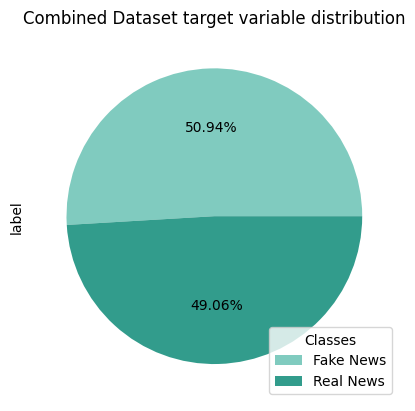

In [ ]:
#WELFake target variable distribution
labels = ["Fake News", "Real News"]
colors = ["#80cbbf", "#329c8c"]

combined_df['label'].value_counts().plot.pie(autopct='%.2f%%', labels=None, colors=colors, title="Combined Dataset target variable distribution")

plt.legend(labels, title="Classes", loc="lower right")

### Real news vs Fake News - Length Comparation

Text(0.5, 1.0, 'Real news vs Fake News - Dataset Combination - Length Comparation')

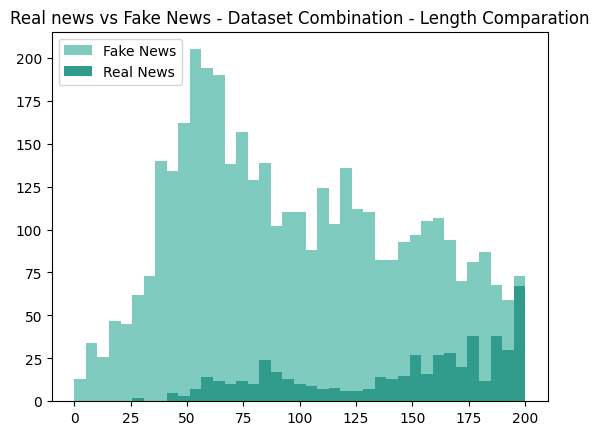

In [8]:
#Real news vs Fake News - Dataset Combination
analysis_dataframe = pd.DataFrame()
analysis_dataframe["label"] =  combined_df["label"]
analysis_dataframe["text_length"] = combined_df["lemmatized"].apply(lambda x: len(str(x)) - str(x).count(" "))

bins = np.linspace(0, 200, 40)

plt.hist(analysis_dataframe[analysis_dataframe["label"]==0]["text_length"], bins, label="Fake News", color="#80cbbf")
plt.hist(analysis_dataframe[analysis_dataframe["label"]==1]["text_length"], bins, label="Real News", color="#329c8c")

plt.legend(loc="upper left")

plt.title('Real news vs Fake News - Dataset Combination - Length Comparation')

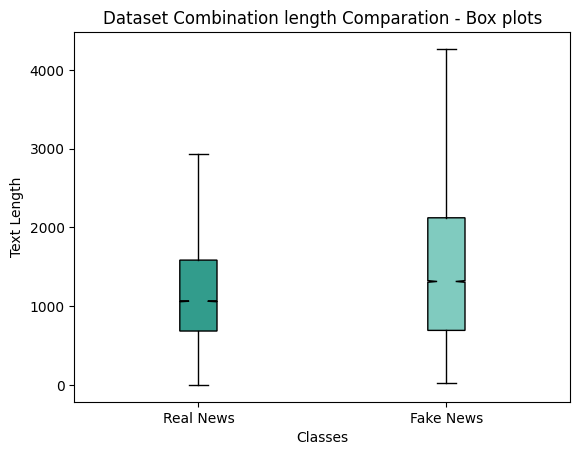

In [ ]:
#Real news vs Fake News - Dataset Combination
data = [analysis_dataframe[analysis_dataframe['label'] == label]['text_length'].values for label in analysis_dataframe['label'].unique()]

bplot = plt.boxplot(data, notch=True, vert=True, patch_artist=True, labels=['Real News', 'Fake News'], showfliers=False)

colors = ['#329c8c', '#80cbbf']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median_line in bplot['medians']:
    median_line.set_visible(False)

plt.title("Dataset Combination Length Comparation - Box plots")
plt.xlabel("Classes")
plt.grid(False)
plt.ylabel("Text Length")
plt.show()

###Most frequent words in Real News

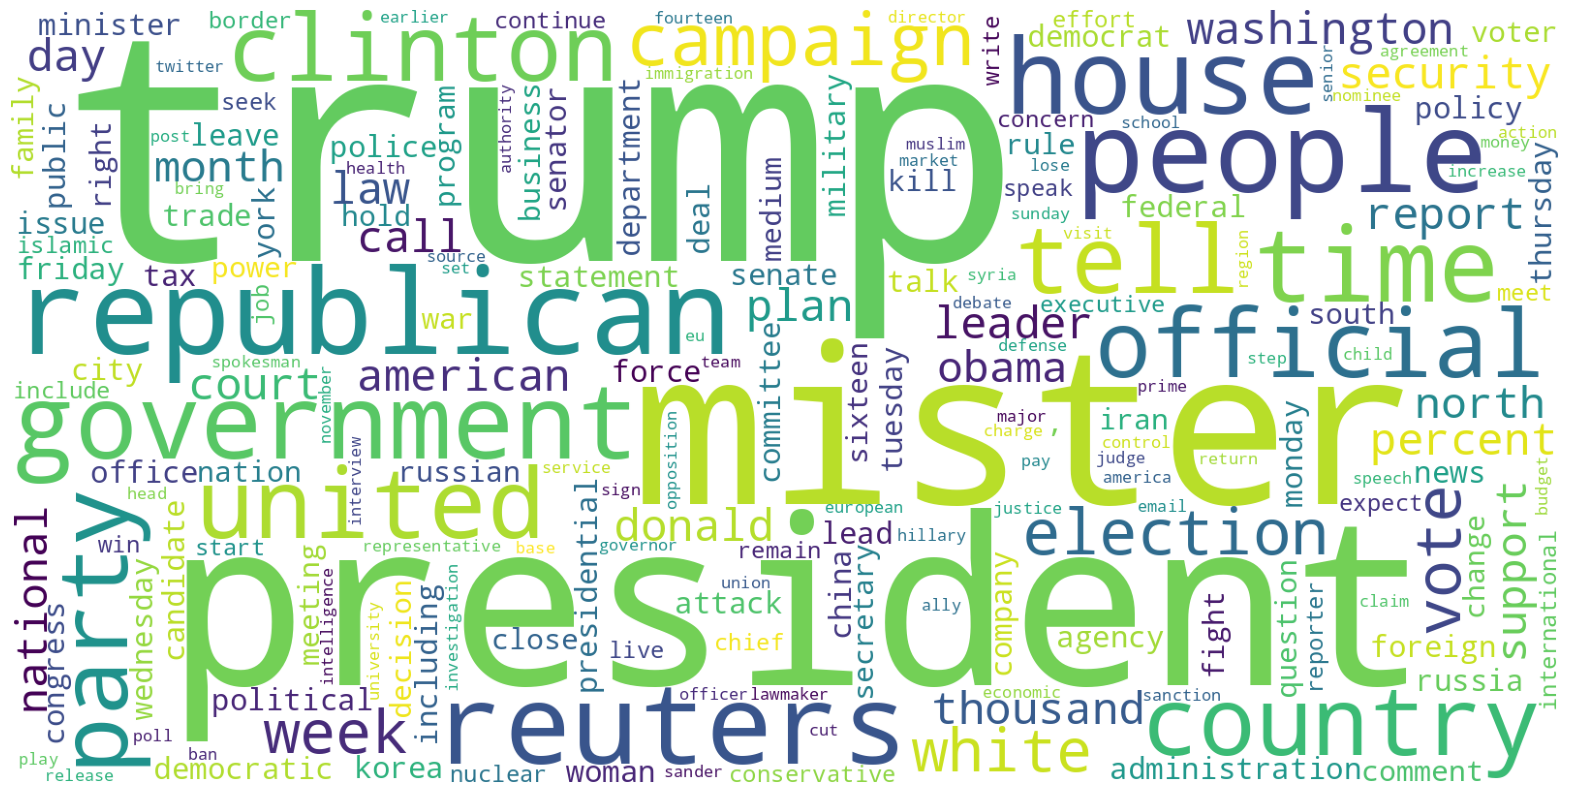

In [ ]:
#Most frequent words in Real News - Combined Datsets
real = combined_df.loc[combined_df['label'] == 1]
real_tokens = [word_tokenize(str(sublist)) for sublist in real['lemmatized']]

real_words = [item for sublist in real_tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(real_words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

###Most frequent words in Fake News

> Blocco con rientro



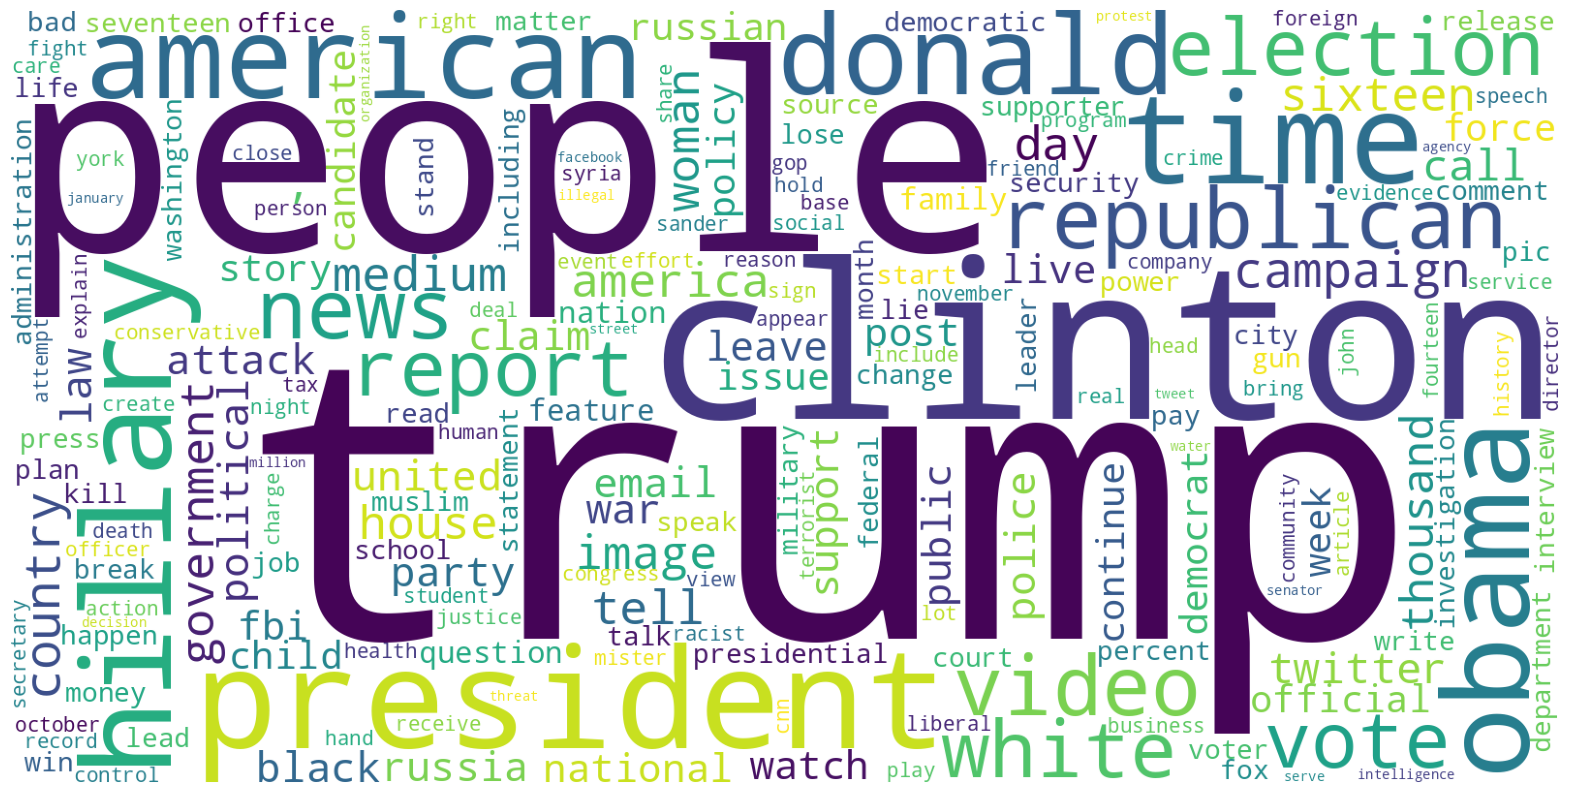

In [ ]:
#Most frequent words in Fake News - Combined Dataset
real = combined_df.loc[combined_df['label'] == 0]
real_tokens = [word_tokenize(str(sublist)) for sublist in real['lemmatized']]

real_words = [item for sublist in real_tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(real_words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

##Base tokenization

###Tokenization of the datastes

In [ ]:
#Basic tokenizer
def basic_tokenizer(old_dataframe, column="lemmatized"):
  old_dataframe['tokenized'] = old_dataframe[column].astype(str).apply(word_tokenize)
  return old_dataframe

In [ ]:
%%time
#Basic tokenization of Combined Datsets with lemmatization
combined_df=basic_tokenizer(combined_df)

CPU times: user 1min 19s, sys: 831 ms, total: 1min 20s
Wall time: 1min 24s


In [ ]:
#Print Combined Datsets
combined_df.head()

,lemmatized,label,tokenized
0,beware communist socialist progressive congres...,0,"[beware, communist, socialist, progressive, co..."
1,trump humiliated whining refusing voter info v...,0,"[trump, humiliated, whining, refusing, voter, ..."
2,berlin united nation trump thursday evening br...,1,"[berlin, united, nation, trump, thursday, even..."
3,hilarious fox news greg gutfeld introduces spo...,0,"[hilarious, fox, news, greg, gutfeld, introduc..."
4,trump nominate chatterjee powelson ferc white ...,1,"[trump, nominate, chatterjee, powelson, ferc, ..."


## Models with GloVe

###Splits based on base tokenization

In [ ]:
#Split WELFake dataset
X_train_combined_df =  combined_df['lemmatized'].values

y_train_combined_df = combined_df['label'].values

X_train_combined_df, X_validation_combined_df, y_train_combined_df, y_validation_combined_df = train_test_split(
    X_train_combined_df, y_train_combined_df,
    stratify=y_train_combined_df,
    test_size=0.2,
    random_state=42
)

###Transform tokens to sequences

In [ ]:
%%time
#Tokens to sequence for Combined Dataset
vectorizer_combined_df = layers.TextVectorization(max_tokens=max_features_in_embedding_vector, output_sequence_length=embedding_size)
text_ds = tf_data.Dataset.from_tensor_slices(X_train_combined_df).batch(128)
vectorizer_combined_df.adapt(text_ds)

vocabulary_combined_df = vectorizer_combined_df.get_vocabulary()
word_index_combined_df = dict(zip(vocabulary_combined_df, range(len(vocabulary_combined_df))))

CPU times: user 6.02 s, sys: 132 ms, total: 6.15 s
Wall time: 10.4 s


###Generate the embedding layer

In [ ]:
def embedding_layer_generator(vocabulary, word_index, embedding_size, file_name_GloVe):
  embeddings_index = {}
  with open(file_name_GloVe) as f:
      for line in f:
          word, coefs = line.split(maxsplit=1)
          coefs = np.fromstring(coefs, "f", sep=" ")
          embeddings_index[word] = coefs
  num_tokens = len(vocabulary) + 2

  embedding_matrix = np.zeros((num_tokens, embedding_size))
  for word, i in word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
          embedding_matrix[i] = embedding_vector

  embedding_layer = Embedding(
      num_tokens,
      embedding_size,
      trainable=False,
  )
  embedding_layer.build((1,))
  embedding_layer.set_weights([embedding_matrix])

  return embedding_layer

In [ ]:
%%time
#Generate the embeddings layer for Combined Dataset
combined_df_embedding_layer=embedding_layer_generator(vocabulary_combined_df, word_index_combined_df, embedding_size, file_name_GloVe)

CPU times: user 27 s, sys: 1.43 s, total: 28.4 s
Wall time: 30.7 s


### Basic NN - Training models

In [ ]:
%%time
#Convert list-of-strings data to NumPy arrays of integer indices -
batch_size = 1000
X_train = []
for i in range(0, len(X_train_combined_df), batch_size):
    batch = X_train_combined_df[i:i+batch_size]
    X_train.append(vectorizer_combined_df(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_combined_df), batch_size):
    batch = X_validation_combined_df[i:i+batch_size]
    X_val.append(vectorizer_combined_df(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_WELFake), batch_size):
    batch = X_test_WELFake[i:i+batch_size]
    X_test.append(vectorizer_combined_df(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_combined_df)
y_val = np.array(y_validation_combined_df)
y_test = np.array(y_test_WELFake)

CPU times: user 15.3 s, sys: 1.11 s, total: 16.4 s
Wall time: 16.3 s


In [ ]:
#Creation of the basic model - Combined Datsets
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = combined_df_embedding_layer(int_sequences_input)
x = layers.Conv1D(64, 5, activation='relu')(embedded_sequences)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
preds = layers.Dense(1, activation='sigmoid')(x)

basic_model_combined_df = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
basic_model_combined_df.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Summary of the basic model - Combined Datsets
basic_model_combined_df.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1000200   
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                           

In [ ]:
%%time
#Basic model training - Combined Datsets
history_combined_df = basic_model_combined_df.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1097/1097 [==============================] - 6s 5ms/step - loss: 1.0629 - accuracy: 0.6919 - val_loss: 0.6907 - val_accuracy: 0.8668
Epoch 2/5
1097/1097 [==============================] - 6s 5ms/step - loss: 0.6099 - accuracy: 0.8570 - val_loss: 0.4480 - val_accuracy: 0.8962
Epoch 3/5
1097/1097 [==============================] - 5s 5ms/step - loss: 0.4165 - accuracy: 0.8969 - val_loss: 0.3171 - val_accuracy: 0.9238
Epoch 4/5
1097/1097 [==============================] - 6s 5ms/step - loss: 0.3165 - accuracy: 0.9138 - val_loss: 0.2523 - val_accuracy: 0.9336
Epoch 5/5
1097/1097 [==============================] - 5s 5ms/step - loss: 0.2626 - accuracy: 0.9226 - val_loss: 0.2168 - val_accuracy: 0.9373
CPU times: user 31.6 s, sys: 2.26 s, total: 33.9 s
Wall time: 42 s


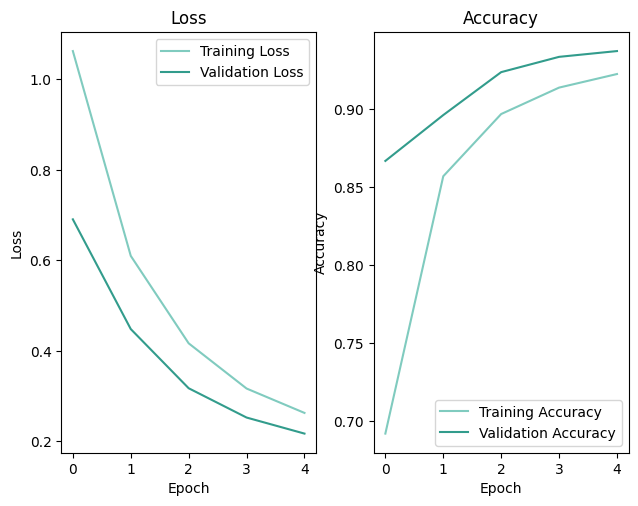

In [ ]:
#Plotting Combined Datsets performance
plot_performance(history_combined_df)

451/451 [==============================] - 1s 2ms/step
Accuracy: 0.9165280088740987
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7418
           1       0.96      0.87      0.91      7006

    accuracy                           0.92     14424
   macro avg       0.92      0.92      0.92     14424
weighted avg       0.92      0.92      0.92     14424

CPU times: user 1.31 s, sys: 109 ms, total: 1.42 s
Wall time: 1.54 s


<Axes: xlabel='Predicted', ylabel='Actual'>

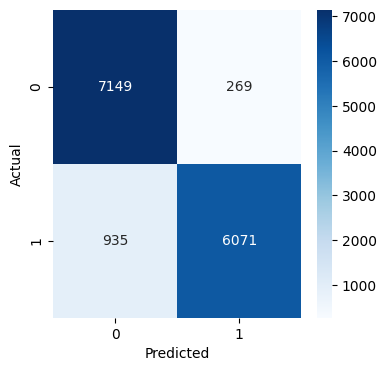

In [ ]:
%%time
#Plotting the performance on test set
y_pred = basic_model_combined_df.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

###Basic NN - Saving models

In [ ]:
#Saving model Combined Datsets
basic_model_combined_df.save(file_name_model_basic_combined)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Basic NN - Loading models


In [ ]:
#Loading model Combined Datsets
basic_model_combined_df = load_model(file_name_model_basic_combined, custom_objects=None, compile=True, safe_mode=True)


###LSTM - Training models

In [ ]:
%%time
#Convert list-of-strings data to NumPy arrays of integer indices -
batch_size = 1000
X_train = []
for i in range(0, len(X_train_combined_df), batch_size):
    batch = X_train_combined_df[i:i+batch_size]
    X_train.append(vectorizer_combined_df(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_combined_df), batch_size):
    batch = X_validation_combined_df[i:i+batch_size]
    X_val.append(vectorizer_combined_df(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_WELFake), batch_size):
    batch = X_test_WELFake[i:i+batch_size]
    X_test.append(vectorizer_combined_df(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_combined_df)
y_val = np.array(y_validation_combined_df)
y_test = np.array(y_test_WELFake)

CPU times: user 15 s, sys: 843 ms, total: 15.9 s
Wall time: 15.7 s


In [ ]:
#Creation of the LSTM model
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = combined_df_embedding_layer(int_sequences_input)
x = layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
x = Dropout(0.2)(x)
preds = layers.Dense(1, activation='sigmoid')(x)

lstm_model_combined_df = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
lstm_model_combined_df.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Summary of the LSTM model - Combined Datsets
lstm_model_combined_df.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1000200   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1017257 (3.88 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 1000200 (3.82 MB)
_________________________________________________________________


In [ ]:
%%time
#LSTM model training - Combined Datsets
history_combined_df = lstm_model_combined_df.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1097/1097 [==============================] - 400s 359ms/step - loss: 0.5396 - accuracy: 0.7369 - val_loss: 0.4407 - val_accuracy: 0.8393
Epoch 2/5
1097/1097 [==============================] - 341s 311ms/step - loss: 0.4434 - accuracy: 0.8295 - val_loss: 0.4247 - val_accuracy: 0.8368
Epoch 3/5
1097/1097 [==============================] - 336s 307ms/step - loss: 0.4330 - accuracy: 0.8381 - val_loss: 0.4033 - val_accuracy: 0.8555
Epoch 4/5
1097/1097 [==============================] - 333s 303ms/step - loss: 0.4382 - accuracy: 0.8398 - val_loss: 0.4060 - val_accuracy: 0.8574
Epoch 5/5
1097/1097 [==============================] - 338s 308ms/step - loss: 0.4212 - accuracy: 0.8467 - val_loss: 0.4072 - val_accuracy: 0.8499
CPU times: user 36min 38s, sys: 3min 3s, total: 39min 41s
Wall time: 29min 26s


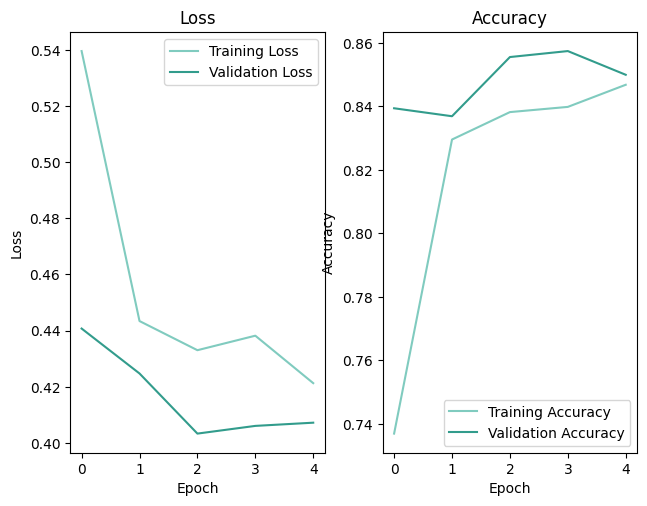

In [ ]:
#Plotting Combined Datsets performance
plot_performance(history_combined_df)

451/451 [==============================] - 14s 31ms/step
Accuracy: 0.8065030504714364
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83      7418
           1       0.89      0.68      0.77      7006

    accuracy                           0.81     14424
   macro avg       0.82      0.80      0.80     14424
weighted avg       0.82      0.81      0.80     14424

CPU times: user 14.4 s, sys: 222 ms, total: 14.6 s
Wall time: 20.9 s


<Axes: xlabel='Predicted', ylabel='Actual'>

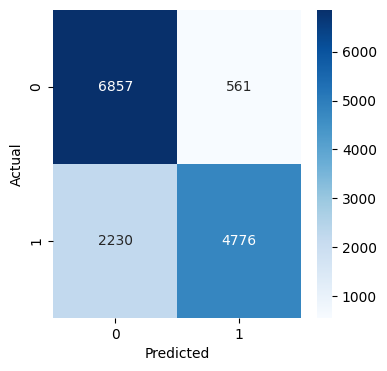

In [ ]:
%%time
#Plotting the performance on test set
y_pred = lstm_model_combined_df.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

###LSTM - Saving models

In [ ]:
#Saving model - Combined Datsets
lstm_model_combined_df.save(fine_name_model_lstm_combined)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###LSTM - Loading models

In [ ]:
#Loading model - Combined Datsets
lstm_model_combined_df = load_model(fine_name_model_lstm_combined, custom_objects=None, compile=True, safe_mode=True)


###BI-LSTM - Training models



In [ ]:
%%time
#Convert list-of-strings data to NumPy arrays of integer indices -
batch_size = 1000
X_train = []
for i in range(0, len(X_train_combined_df), batch_size):
    batch = X_train_combined_df[i:i+batch_size]
    X_train.append(vectorizer_combined_df(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_combined_df), batch_size):
    batch = X_validation_combined_df[i:i+batch_size]
    X_val.append(vectorizer_combined_df(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_WELFake), batch_size):
    batch = X_test_WELFake[i:i+batch_size]
    X_test.append(vectorizer_combined_df(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_combined_df)
y_val = np.array(y_validation_combined_df)
y_test = np.array(y_test_WELFake)

CPU times: user 14.5 s, sys: 1.04 s, total: 15.5 s
Wall time: 15.4 s


In [ ]:
#Creation of the BI-LSTM model - Combined Datsets
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = combined_df_embedding_layer(int_sequences_input)
x = layers.Bidirectional(LSTM(200, dropout=0.2, recurrent_dropout=0.2))(embedded_sequences)
preds = layers.Dense(1, activation='sigmoid')(x)

model_bilstm_combined_df = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model_bilstm_combined_df.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the BI-LSTM model - Combined Datsets
model_bilstm_combined_df.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1000200   
                                                                 
 bidirectional (Bidirection  (None, 400)               481600    
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1482201 (5.65 MB)
Trainable params: 482001 (1.84 MB)
Non-trainable params: 1000200 (3.82 MB)
_________________________________________________________________


In [ ]:
%%time
#BI-LSTM model training
history_combined_df = model_bilstm_combined_df.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1097/1097 [==============================] - 657s 594ms/step - loss: 0.2742 - accuracy: 0.8895 - val_loss: 0.2143 - val_accuracy: 0.9208
Epoch 2/5
1097/1097 [==============================] - 657s 599ms/step - loss: 0.1750 - accuracy: 0.9346 - val_loss: 0.1447 - val_accuracy: 0.9485
Epoch 3/5
1097/1097 [==============================] - 642s 585ms/step - loss: 0.1462 - accuracy: 0.9472 - val_loss: 0.1260 - val_accuracy: 0.9548
Epoch 4/5
1097/1097 [==============================] - 642s 585ms/step - loss: 0.1305 - accuracy: 0.9534 - val_loss: 0.1424 - val_accuracy: 0.9464
Epoch 5/5
1097/1097 [==============================] - 643s 586ms/step - loss: 0.1210 - accuracy: 0.9560 - val_loss: 0.1135 - val_accuracy: 0.9590
CPU times: user 1h 14min 8s, sys: 6min 35s, total: 1h 20min 44s
Wall time: 54min


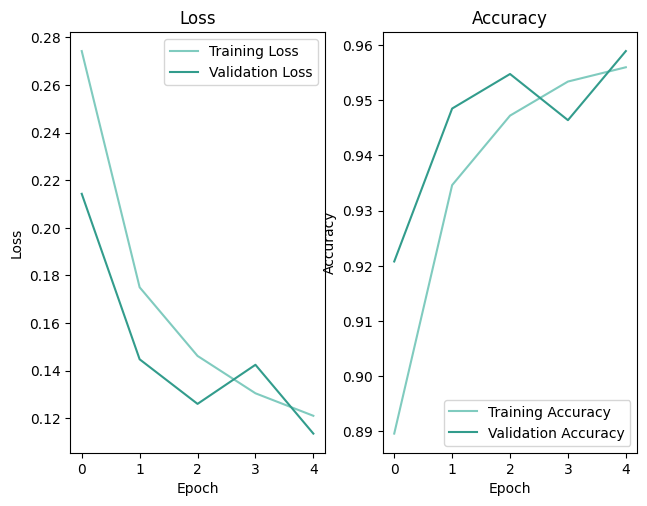

In [ ]:
#Plotting Combined Datsets performance
plot_performance(history_combined_df)

451/451 [==============================] - 27s 59ms/step
Accuracy: 0.940030504714365
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7418
           1       0.98      0.89      0.94      7006

    accuracy                           0.94     14424
   macro avg       0.94      0.94      0.94     14424
weighted avg       0.94      0.94      0.94     14424

CPU times: user 26.9 s, sys: 328 ms, total: 27.2 s
Wall time: 41.5 s


<Axes: xlabel='Predicted', ylabel='Actual'>

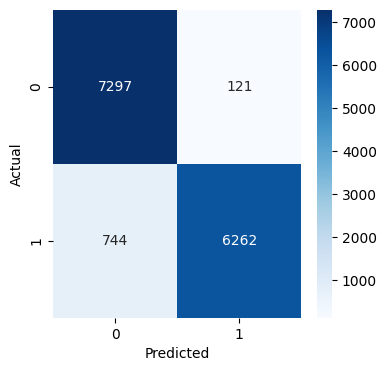

In [ ]:
%%time
#Plotting the performance on test set
y_pred = model_bilstm_combined_df.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

###BI-LSTM - Saving models

In [ ]:
#Saving model Combined Datsets
model_bilstm_combined_df.save(fine_name_model_bi_lstm_combined)

###BI-LSTM - Loading models

In [ ]:
#Loading model Combined Datsets
model_bilstm_combined_df = load_model(fine_name_model_bi_lstm_combined, custom_objects=None, compile=True, safe_mode=True)

## Models with wordpiece

###Train, validation & test split

In [ ]:
X_train_WELFake, X_test_WELFake, y_train_WELFake, y_test_WELFake = train_test_split(
    preprocessed_WELFake_dataset["text"].astype(str),
    preprocessed_WELFake_dataset["label"],
    stratify=preprocessed_WELFake_dataset["label"],
    test_size=0.2,
    random_state=42)

### Combination Dataset

In [ ]:
preprocessed_WELFake_dataset_x = pd.DataFrame(X_train_WELFake, columns=['text'])
preprocessed_WELFake_dataset_y = pd.DataFrame(y_train_WELFake, columns=['label'])


combined_array=np.column_stack((preprocessed_WELFake_dataset_x , preprocessed_WELFake_dataset_y))

preprocessed_WELFake_dataset_train= pd.DataFrame(combined_array, columns = ['text','label'])


preprocessed_WELFake_dataset_train

,text,label
0,beware communists socialists progressives cong...,0
1,trump humiliated whining refusing voter info v...,0
2,berlin united nations trump thursday evening b...,1
3,hilarious fox news greg gutfeld introduces spo...,0
4,trump nominate chatterjee powelson ferc white ...,1
...,...,...
57691,boehner allies downplay gop rifts washington c...,1
57692,fox news monopoly liberal murdoch sons fired o...,0
57693,san bernardino adults dead injured school murd...,0
57694,report obama intel officials russia blackmail ...,1


In [ ]:
sampled_ISOT_text = sampled_ISOT_complete[['text', 'label']]

In [ ]:
combined_df = pd.concat([preprocessed_WELFake_dataset_train, sampled_ISOT_text], ignore_index=True)

In [ ]:
#Split WELFake dataset
X_train_combined_df =  combined_df['text'].values

y_train_combined_df = combined_df['label'].values

X_train_combined_df, X_validation_combined_df, y_train_combined_df, y_validation_combined_df = train_test_split(
    X_train_combined_df, y_train_combined_df,
    stratify=y_train_combined_df,
    test_size=0.2,
    random_state=42
)

###BERT - Training models

In [ ]:
#Build the model
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess)
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True)
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation="sigmoid", name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
#Some parameters
X_train=X_train_combined_df
y_train=y_train_combined_df
X_val=X_validation_combined_df
y_val=y_validation_combined_df
X_test=X_test_WELFake
y_test=y_test_WELFake

epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(tf.data.Dataset.from_tensor_slices(X_train_combined_df)).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

In [ ]:
#Creation of the model
BERT_model_combined_df = build_classifier_model()

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
BERT_model_combined_df.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the basic model - Combined Datsets
BERT_model_combined_df.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer_6 (KerasLayer)  {'input_mask': (None, 128)   0         ['input_8[0][0]']             
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                            

In [ ]:
%%time
#Basic model training - Combined Datsets
y_train= np.asarray(y_train).astype('float32')
y_val= np.asarray(y_val).astype('float32')

history_combined_df = BERT_model_combined_df.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1097/1097 [==============================] - 642s 585ms/step - loss: 0.1881 - accuracy: 0.9323 - val_loss: 0.1263 - val_accuracy: 0.9540
Epoch 2/5
1097/1097 [==============================] - 640s 583ms/step - loss: 0.1216 - accuracy: 0.9576 - val_loss: 0.0974 - val_accuracy: 0.9634
Epoch 3/5
1097/1097 [==============================] - 634s 578ms/step - loss: 0.0955 - accuracy: 0.9659 - val_loss: 0.0830 - val_accuracy: 0.9689
Epoch 4/5
1097/1097 [==============================] - 633s 577ms/step - loss: 0.0792 - accuracy: 0.9715 - val_loss: 0.0788 - val_accuracy: 0.9747
Epoch 5/5
1097/1097 [==============================] - 635s 579ms/step - loss: 0.0660 - accuracy: 0.9773 - val_loss: 0.0641 - val_accuracy: 0.9777
CPU times: user 49min 44s, sys: 5min 30s, total: 55min 14s
Wall time: 53min 3s


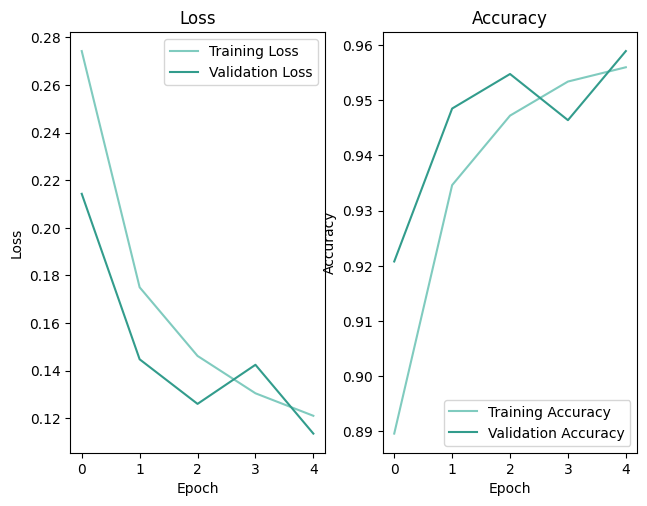

In [ ]:
#Plotting Combined Datsets performance
plot_performance(history_combined_df)

451/451 [==============================] - 55s 120ms/step
Accuracy: 0.968801996672213
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7418
           1       0.97      0.96      0.97      7006

    accuracy                           0.97     14424
   macro avg       0.97      0.97      0.97     14424
weighted avg       0.97      0.97      0.97     14424

CPU times: user 1min 3s, sys: 6.16 s, total: 1min 9s
Wall time: 54.9 s


<Axes: xlabel='Predicted', ylabel='Actual'>

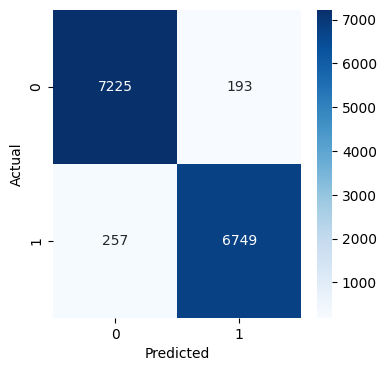

In [ ]:
%%time
#Plotting the performance on test set
y_pred = BERT_model_combined_df.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

### BERT - Saving models

In [ ]:
#Saving mode- Combined Datsets
BERT_model_combined_df.save(fine_name_model_bert_combined)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### BERT - Loading models

In [ ]:
#Loading model
BERT_model_combined_df = load_model(fine_name_model_bert_combined, custom_objects={'KerasLayer':hub.KerasLayer, 'optimizer':optimizer}, compile=False)